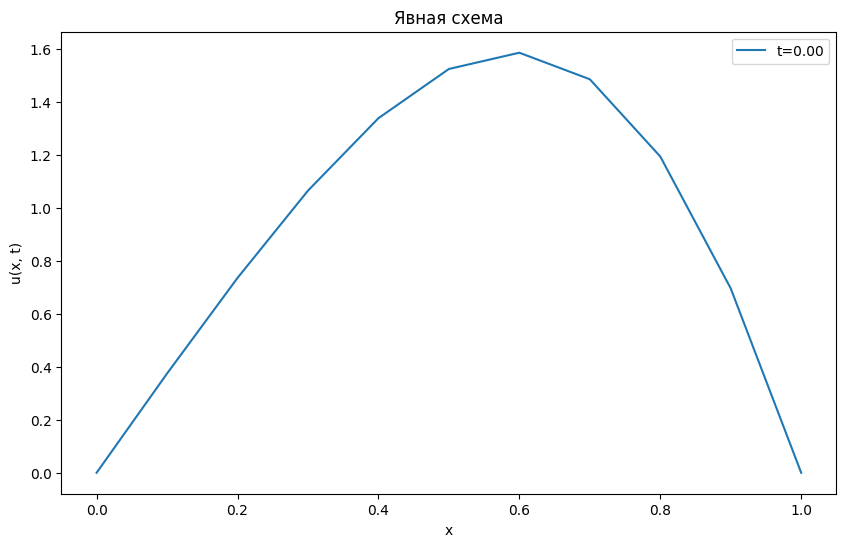

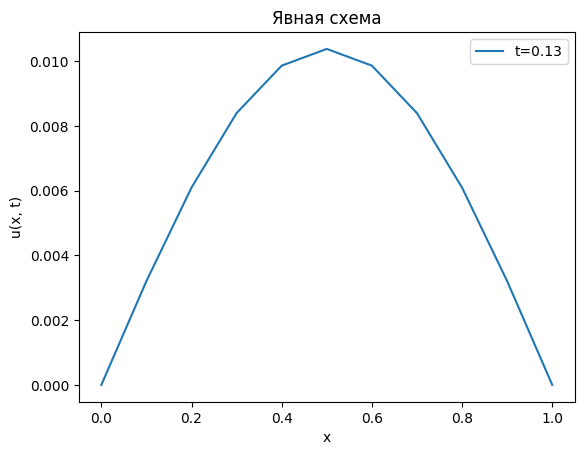

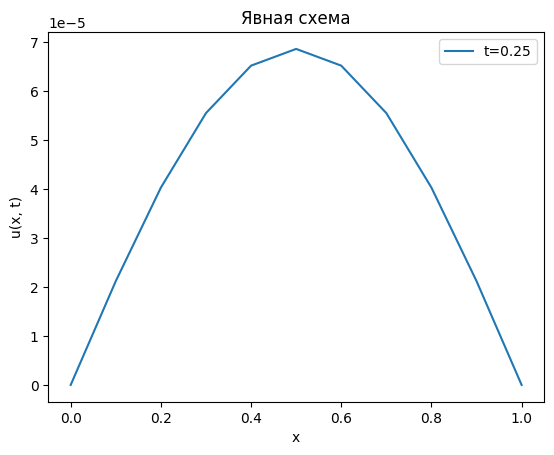

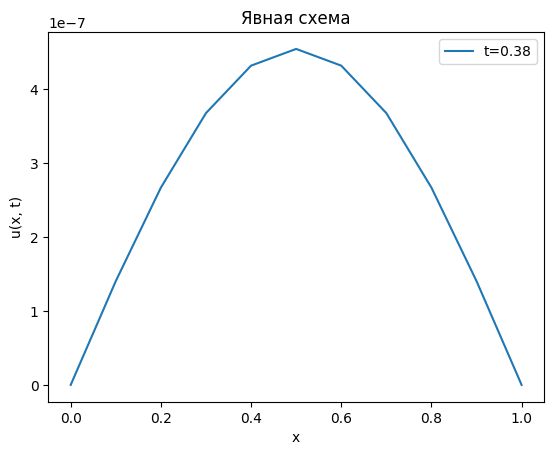

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры
N = 10

L = 1.0  # Длина стержня
T = 1.0  # Время моделирования
alpha = 4  # Коэффициент температуропроводности
dx = L / N  # Шаг по пространству
dt = dx ** 2 / 2 / alpha  # Шаг по времени
sigma = alpha * dt / dx ** 2

# Проверка устойчивости
if sigma > 0.5:
    raise ValueError("Схема неустойчива!")

# Сетка
x = np.arange(0, L + dx, dx)
t = np.arange(0, T + dt, dt)
u = np.zeros((len(t), len(x)))

# Начальное условие: синусоида
u[0, :] = (1.3 * x ** 2 + 1.2) * np.sin(np.pi * x)

# Граничные условия
u[:, 0] = 0
u[:, -1] = 0

# Явная схема
for n in range(len(t) - 1):
    for i in range(1, len(x) - 1):
        u[n + 1, i] = u[n, i] + sigma * (u[n, i + 1] - 2 * u[n, i] + u[n, i - 1])

# Визуализация
plt.figure(figsize=(10, 6))
for n in [0, 100, 200, 300]:
    plt.plot(x, u[n, :], label=f"t={t[n]:.2f}")
    plt.xlabel("x")
    plt.ylabel("u(x, t)")
    plt.legend()
    plt.title("Явная схема")
    plt.show()

C:\Users\ivand\PycharmProjects\n-ch-2.5\.venv\Lib\site-packages\scipy\sparse\_index.py:210: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray(i, j, x)


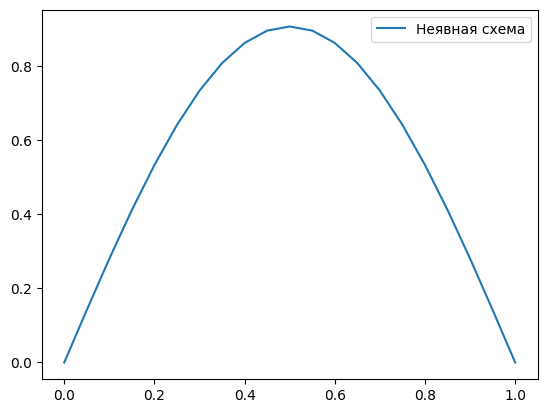

In [2]:
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve

# Параметры
dx = 0.05
dt = 0.01
alpha = 0.01
sigma = alpha * dt / dx ** 2

# Матрица для неявной схемы
A = diags([-sigma, 1 + 2 * sigma, -sigma], [-1, 0, 1], shape=(len(x), len(x))).tocsc()

# Граничные условия
A[0, :] = 0
A[0, 0] = 1
A[-1, :] = 0
A[-1, -1] = 1

# Начальное условие
u = np.sin(np.pi * x)

# Интегрирование
for _ in range(100):
    u = spsolve(A, u)

plt.plot(x, u, label="Неявная схема")
plt.legend()
plt.show()